In [2]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [28]:
train = read.csv('data/FluTrain.csv.xz')

In [30]:
summary(train)

                      Week          ILI            Queries       
 2004-01-04 - 2004-01-10:  1   Min.   :0.5341   Min.   :0.04117  
 2004-01-11 - 2004-01-17:  1   1st Qu.:0.9025   1st Qu.:0.15671  
 2004-01-18 - 2004-01-24:  1   Median :1.2526   Median :0.28154  
 2004-01-25 - 2004-01-31:  1   Mean   :1.6769   Mean   :0.28603  
 2004-02-01 - 2004-02-07:  1   3rd Qu.:2.0587   3rd Qu.:0.37849  
 2004-02-08 - 2004-02-14:  1   Max.   :7.6189   Max.   :1.00000  
 (Other)                :411                                     

In [13]:
head(train[with(train, order(ILI, decreasing = T)), ])
head(train[with(train, order(Queries, decreasing = T)), ])

,Week,ILI,Queries
303,2009-10-18 - 2009-10-24,7.618892,1
304,2009-10-25 - 2009-10-31,7.388359,0.9269588
302,2009-10-11 - 2009-10-17,6.815222,0.7768924
305,2009-11-01 - 2009-11-07,6.339272,0.8605578
301,2009-10-04 - 2009-10-10,5.660867,0.7436919
215,2008-02-10 - 2008-02-16,5.422575,0.5484728


,Week,ILI,Queries
303,2009-10-18 - 2009-10-24,7.618892,1
304,2009-10-25 - 2009-10-31,7.388359,0.9269588
305,2009-11-01 - 2009-11-07,6.339272,0.8605578
365,2010-12-26 - 2011-01-01,3.431723,0.8061089
302,2009-10-11 - 2009-10-17,6.815222,0.7768924
366,2011-01-02 - 2011-01-08,2.691511,0.7596282


In [15]:
subset(train, ILI==max(ILI))
which.max(train$ILI)

,Week,ILI,Queries
303,2009-10-18 - 2009-10-24,7.618892,1


[1] 303

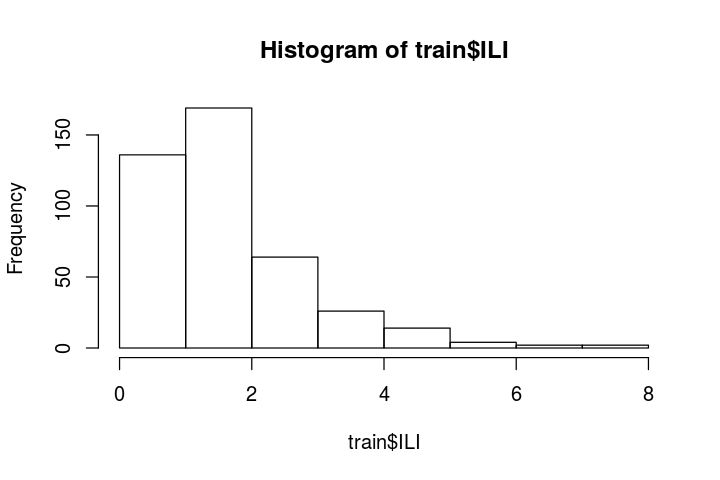

In [17]:
options(repr.plot.width=6, repr.plot.height=4)
hist(train$ILI)

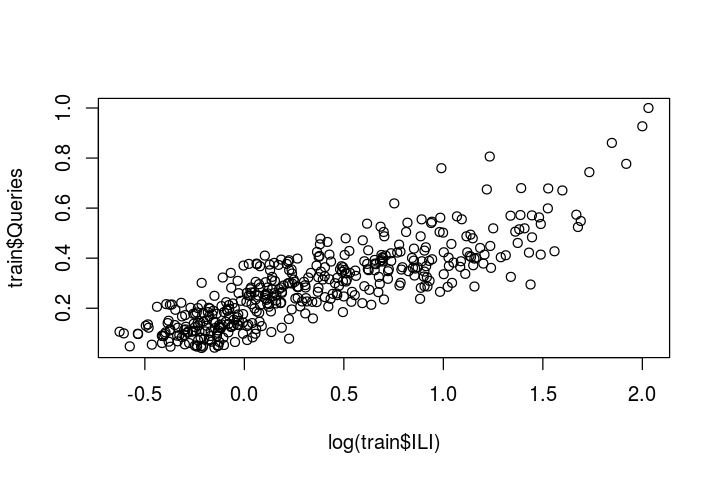

In [18]:
plot(log(train$ILI), train$Queries)

In [23]:
FluTrend1 = lm(log(ILI) ~ Queries, data=train)
#FluTrend1 = lm(Queries ~ log(ILI), data=train)
summary(FluTrend1)


Call:
lm(formula = log(ILI) ~ Queries, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76003 -0.19696 -0.01657  0.18685  1.06450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.49934    0.03041  -16.42   <2e-16 ***
Queries      2.96129    0.09312   31.80   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2995 on 415 degrees of freedom
Multiple R-squared:  0.709,	Adjusted R-squared:  0.7083 
F-statistic:  1011 on 1 and 415 DF,  p-value: < 2.2e-16


In [42]:
x = cor(log(train$ILI), train$Queries)
x^2
log(1/x)
exp(-0.5*x)

[1] 0.7090201

[1] 0.1719357

[1] 0.6563792

In [43]:
test = read.csv('data/FluTest.csv.xz')

In [44]:
predtest1 = exp(predict(FluTrend1, newdata=test))

In [61]:
#test$Week
both = cbind(test, predtest1)
subset(both, Week=='2012-03-11 - 2012-03-17')
(2.293422 - 2.187378)/2.293422

,Week,ILI,Queries,predtest1
11,2012-03-11 - 2012-03-17,2.293422,0.4329349,2.187378


[1] 0.04623833

In [67]:
#sqrt(sum((predtest1 - test$ILI)^2) / nrow(test))
SSE = sum((predtest1 - test$ILI)^2)
RMSE = sqrt(SSE / nrow(test))
RMSE
sqrt(mean((predtest1-test$ILI)^2))

[1] 0.7490645

[1] 0.7490645

In [68]:
library(zoo)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [69]:
ILILag2 = lag(zoo(train$ILI), -2, na.pad=T)
train$ILILag2 = coredata(ILILag2)

In [72]:
summary(train$ILILag2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.5341  0.9010  1.2520  1.6750  2.0580  7.6190       2 

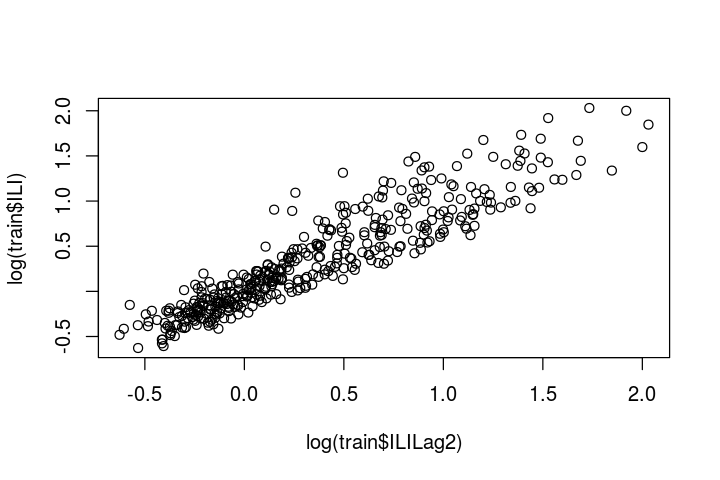

In [73]:
plot(log(train$ILILag2), log(train$ILI))

In [76]:
FluTrend2 = lm(log(ILI) ~ Queries + log(ILILag2), data=train)
summary(FluTrend2)


Call:
lm(formula = log(ILI) ~ Queries + log(ILILag2), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52209 -0.11082 -0.01819  0.08143  0.76785 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.24064    0.01953  -12.32   <2e-16 ***
Queries       1.25578    0.07910   15.88   <2e-16 ***
log(ILILag2)  0.65569    0.02251   29.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1703 on 412 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9063,	Adjusted R-squared:  0.9059 
F-statistic:  1993 on 2 and 412 DF,  p-value: < 2.2e-16


In [77]:
ILILag2test = lag(zoo(test$ILI), -2, na.pad=T)
test$ILILag2 = coredata(ILILag2test)

In [78]:
summary(ILILag2test)

     Index        ILILag2test    
 Min.   : 1.00   Min.   :0.9018  
 1st Qu.:13.75   1st Qu.:1.1359  
 Median :26.50   Median :1.3409  
 Mean   :26.50   Mean   :1.5188  
 3rd Qu.:39.25   3rd Qu.:1.7606  
 Max.   :52.00   Max.   :3.6002  
                 NA's   :2       

In [86]:
test$ILILag2[1] = train$ILI[nrow(train)-1]
test$ILILag2[2] = train$ILI[nrow(train)]
head(test)

,Week,ILI,Queries,ILILag2
1,2012-01-01 - 2012-01-07,1.766707,0.5936255,1.852736
2,2012-01-08 - 2012-01-14,1.543401,0.499336,2.12413
3,2012-01-15 - 2012-01-21,1.647615,0.500664,1.766707
4,2012-01-22 - 2012-01-28,1.684297,0.4794157,1.543401
5,2012-01-29 - 2012-02-04,1.863542,0.4714475,1.647615
6,2012-02-05 - 2012-02-11,1.864079,0.5033201,1.684297


In [89]:
predtest2 = exp(predict(FluTrend2, newdata=test))
SSE = sum((predtest2 - test$ILI)^2)
RMSE = sqrt(SSE / nrow(test))
RMSE
# sqrt(mean((PredTest2-FluTest$ILI)^2))

[1] 0.2942029